# K-Nearest-Neighbor

## 概念理解 

### 语言描述 

K最近邻(k-Nearest Neighbor，KNN)分类算法，是一个理论上比较成熟的方法，也是最简单的机器学习算法之一。该方法的思路是：如果一个样本在特征空间中的k个最相似(即特征空间中最邻近)的样本中的大多数属于某一个类别，则该样本也属于这个类别。即是给定一个训练数据集，对新的输入实例，在训练数据集中找到与该实例最邻近的K个实例（也就是所说的K个邻居）， 这K个实例的多数属于某个类，就把该输入实例分类到这个类中。

KNN 算法的核心思想和最近邻算法思想相似，都是通过寻找和未知样本相似的类别进行分类。但 NN 算法中只依赖 1 个样本进行决策，在分类时过于绝对，会造成分类效果差的情况，为解决 NN 算法的缺陷，KNN 算法采用 K 个相邻样本的方式共同决策未知样本的类别,这样在决策中容错率相对于 NN 算法就要高很多，分类效果也会更好。

### 图解 

例子：要区分“猫”和“狗”，通过“claws”和“sound”两个feature来判断的话，圆形和三角形是已知分类的了，那么这个“star”代表的是哪一类呢？

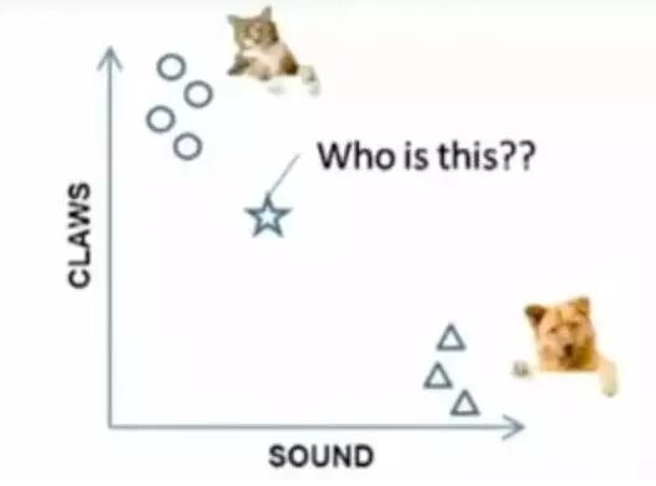

k＝3时，这三条线链接的点就是最近的三个点，那么圆形多一些，所以这个star就是属于猫。

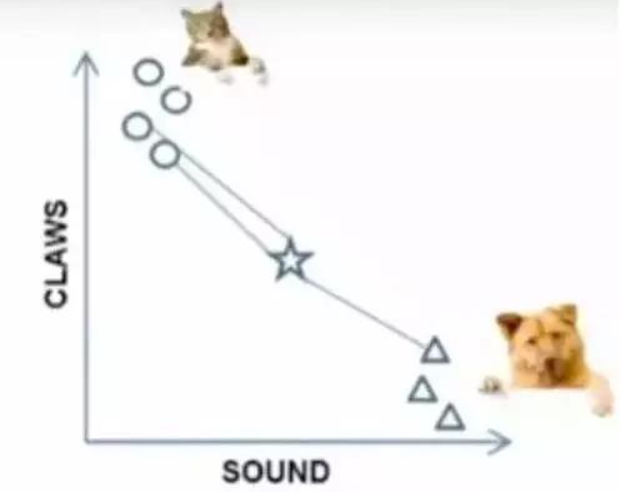

## 算法描述 

### 伪代码 

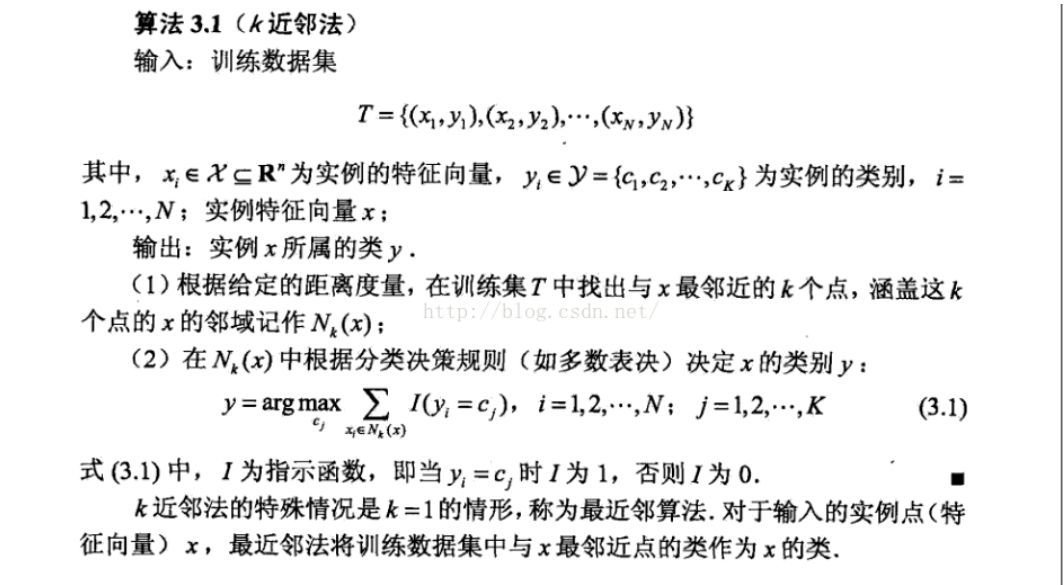

### 实现步骤 

1. 初始化距离为最大值

2. 计算未知样本和每个训练样本的距离dist

3. 得到目前K个最邻近样本中的最大距离maxdist

4. 如果dist小于maxdist，则将该训练样本作为K-最近邻样本

5. 重复步骤2,3,4，直到未知样本和所有训练样本的距离都算完

6. 统计K个最近邻样本中每个类别出现的次数

7. 选择出现频率最大的类别作为未知样本的类别

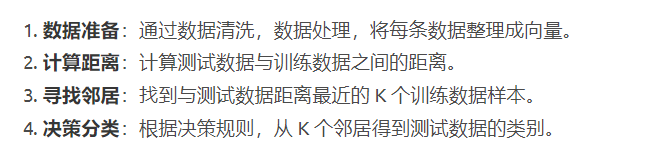

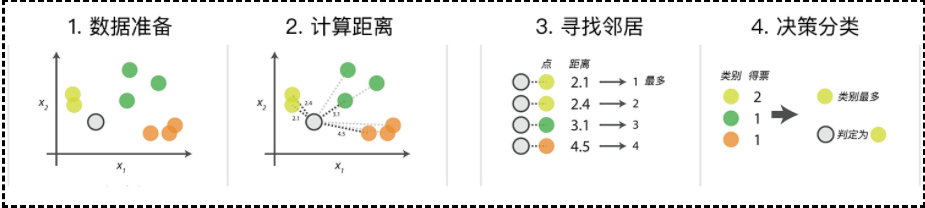

## K-N-N模型三要素 

### 距离度量 

距离度量，说白了就是距离计算公式。

常见的距离计算公式有如下：

    1.欧氏距离
    2.曼哈顿距离
    3.余弦距离
    4.皮尔逊系数
    5.杰卡德距离
    6.闵可夫斯基距离
    7.切比雪夫距离
    8.汉明距离
    9.莱文斯坦距离

####  闵可夫斯基距离

又称闵式距离——<math display="block" xmlns="http://www.w3.org/1998/Math/MathML"><mo mathvariant="italic">&#x3BB;</mo></math>可以随意取值，可以是负数，也可以是正数，或者是无穷大

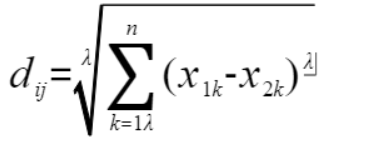

#### 欧式距离 

欧氏距离是最常见的两点之间或多点之间的距离表示法，又称之为欧几里得度量，它定义于欧几里得空间中，是闵可夫斯基距离 <math display="block" xmlns="http://www.w3.org/1998/Math/MathML"><mo mathvariant="italic">&#x3BB;</mo></math>=2 的特殊情形


二维平面

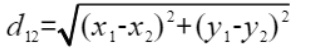

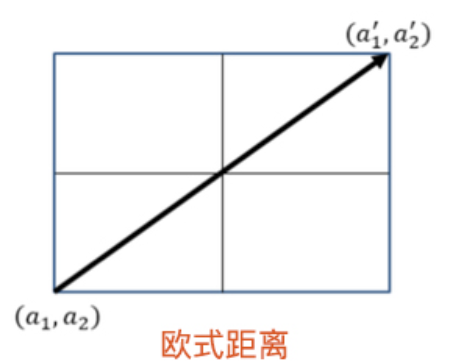

三维空间

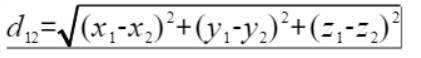

以上是距离求解公式

两个n维向量a(x11,x12,…,x1n)与 b(x21,x22,…,x2n)间的欧氏距离：

 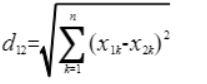

def d_euc(x, y):

    d = np.sqrt(np.sum(square(x - y)))
    
    return d

#### 曼哈顿距离

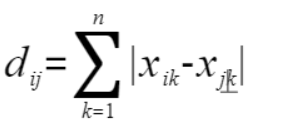

曼哈顿距离计算

def d_man(x, y):
    
    d = np.sum(abs(x - y))
    
    return d

#### 夹角余弦 

夹角也叫余弦相似度，是用向量空间中两个向量夹角的余弦值作为衡量两个个体间差异的大小的度量。如果两个向量的方向一致，即夹角接近零，那么这两个向量就越相近。要确定两个向量方向是否一致，要用到余弦定理计算向量的夹角。

1.二维平面上两向量a(x1,y1)，b(x2,y2)之间的夹角余弦公式：

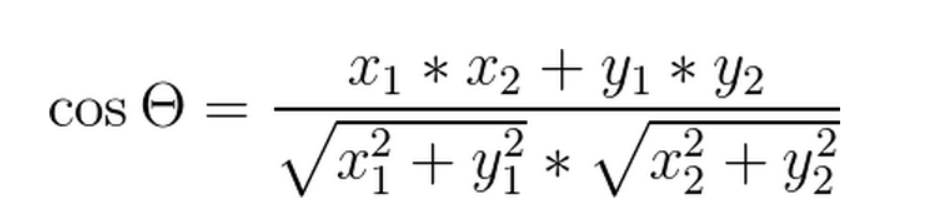

向量形式

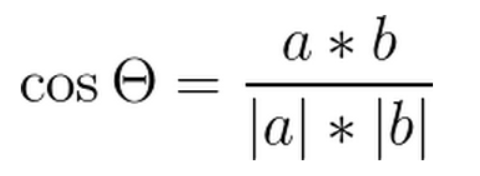

2.n维空间上两点a(x1,x2……..xn)，b(y1,y2……..yn)的夹角余弦公式：

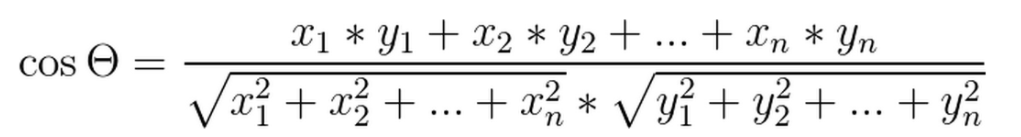

#方法一：根据公式求解

d1=np.dot(x,y)/(np.linalg.norm(x)*np.linalg.norm(y))

#方法二：根据scipy库求解

from scipy.spatial.distance import pdist

X=np.vstack([x,y])

d2=1-pdist(X,'cosine')

In [55]:
import numpy as np
x=np.random.random(10)
y=np.random.random(10)

#方法一：根据公式求解
d1=np.dot(x,y)/(np.linalg.norm(x)*np.linalg.norm(y))

#方法二：根据scipy库求解
from scipy.spatial.distance import pdist
X=np.vstack([x,y])
d2=1-pdist(X,'cosine')

In [56]:
print(d1)
print(d2)

0.837217459051784
[0.83721746]


#### 皮尔逊相关系数 

皮尔逊相关系数定义

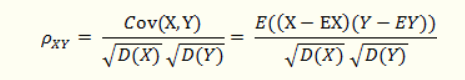

余弦相似度只与向量方向有关，但它会受到向量的平移影响，在夹角余弦公式中如果将 x 平移到 x+1, 余弦值就会改变。怎样才能实现平移不变性？这就要用到皮尔逊相关系数（Pearson correlation），有时候也直接叫相关系数。

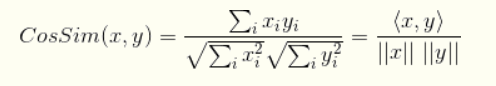

表示向量x和向量y之间的夹角余弦，则皮尔逊相关系数则可表示为：

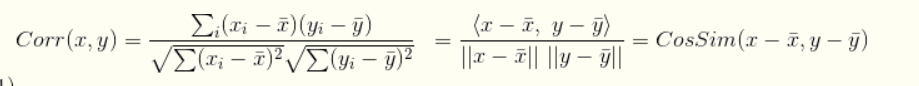

代码实现

import numpy as np

x=np.random.random(10)

y=np.random.random(10)

#方法一：根据公式求解

x_=x-np.mean(x)

y_=y-np.mean(y)

d1=np.dot(x_,y_)/(np.linalg.norm(x_)*np.linalg.norm(y_))

#方法二：根据numpy库求解

X=np.vstack([x,y])

d2=np.corrcoef(X)[0][1]

In [12]:
import numpy as np
x=np.random.random(10)
y=np.random.random(10)

#方法一：根据公式求解
x_=x-np.mean(x)
y_=y-np.mean(y)
d1=np.dot(x_,y_)/(np.linalg.norm(x_)*np.linalg.norm(y_))

#方法二：根据numpy库求解
X=np.vstack([x,y])
d2=np.corrcoef(X)[0][1]

In [14]:
print(d1)
print(d2)

0.5202457105113524
0.5202457105113524


#### 杰卡德相似系数

 杰卡德相似系数
       
       两个集合A和B的交集元素在A，B的并集中所占的比例，称为两个集合的杰卡德相似系数，用符号J(A,B)表示。
       
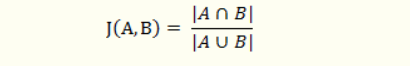

杰卡德距离
       
       与杰卡德相似系数相反的概念是杰卡德距离(Jaccard distance)。杰卡德距离可用如下公式表示：
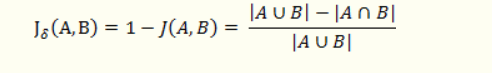杰卡德距离用两个集合中不同元素占所有元素的比例来衡量两个集合的区分度。

杰卡德相似系数与杰卡德距离的应用
       
   可将杰卡德相似系数用在衡量样本的相似度上。
　　
   
   样本A与样本B是两个n维向量，而且所有维度的取值都是0或1。例如：A(0111)和B(1011)。我们将样本看成是一个集合，1表示集合包含该元素，0表示集合不包含该元素。

#方法一：根据公式求解

up=np.double(np.bitwise_and((x != y),np.bitwise_or(x != 0, y != 0)).sum())

down=np.double(np.bitwise_or(x != 0, y != 0).sum())

d1=(up/down)

#方法二：根据scipy库求解

X=np.vstack([x,y])

d2=pdist(X,'jaccard')

In [17]:
import numpy as np
from scipy.spatial.distance import pdist
x=np.random.random(10)>0.5
y=np.random.random(10)>0.5

x=np.asarray(x,np.int32)
y=np.asarray(y,np.int32)

#方法一：根据公式求解
up=np.double(np.bitwise_and((x != y),np.bitwise_or(x != 0, y != 0)).sum())
down=np.double(np.bitwise_or(x != 0, y != 0).sum())
d1=(up/down)
           

#方法二：根据scipy库求解
X=np.vstack([x,y])
d2=pdist(X,'jaccard')

In [18]:
print(d1)
print(d2)

0.625
[0.625]


### K值的选择 

不要小看了这个K值选择问题，因为它对K近邻算法的结果会产生重大影响。

1.

如果选择较小的K值，就相当于用较小的领域中的训练实例进行预测，“学习”近似误差会减小，只有与输入实例较近或相似的训练实例才会对预测结果起作用，与此同时带来的问题是“学习”的估计误差会增大，换句话说，K值的减小就意味着整体模型变得复杂，容易发生过拟合；

2.

如果选择较大的K值，就相当于用较大领域中的训练实例进行预测，其优点是可以减少学习的估计误差，但缺点是学习的近似误差会增大。这时候，与输入实例较远（不相似的）训练实例也会对预测器作用，使预测发生错误，且K值的增大就意味着整体的模型变得简单。

3.

K=N，则完全不足取，因为此时无论输入实例是什么，都只是简单的预测它属于在训练实例中最多的累，模型过于简单，忽略了训练实例中大量有用信息。

在应用中，k值一般取一个比较小的数值，通常采用交叉验证法来选择最优k值

### 分类决策规则 

1.多数表决法

多数表决法类似于投票的过程，也就是在 K 个邻居中选择类别最多的种类作为测试样本的类别。

2.加权表决法

根据距离的远近，对近邻的投票进行加权，距离越近则权重越大，通过权重计算结果最大值的类为测试样本的类别。

## 实例

In [47]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

曼哈顿距离，欧式距离，皮尔逊距离，夹角余弦，杰卡德

In [57]:
def d_man(x, y):#曼哈顿
    d = np.sum(np.abs(x - y))
    return d
def d_euc(x, y):#欧式距离
    d = np.sqrt(np.sum(np.square(x - y)))
    return d
def d_pierxun(x,y):#皮尔逊
    x_=x-np.mean(x)
    y_=y-np.mean(y)
    d=np.dot(x_,y_)/(np.linalg.norm(x_)*np.linalg.norm(y_))
    return d
def d_cos(x,y):#夹角余弦
    d=np.dot(x,y)/(np.linalg.norm(x)*np.linalg.norm(y))
    return d
def d_jiekade(x,y):#杰卡德
    up=np.double(np.bitwise_and((x != y),np.bitwise_or(x != 0, y != 0)).sum())
    down=np.double(np.bitwise_or(x != 0, y != 0).sum())
    d=(up/down)
    return d
x = np.array([3.1, 3.2])
print("x:", x)
y = np.array([2.5, 2.8])
print("y:", y)
d_1= d_man(x, y)
d_2=d_euc(x, y)
d_3=d_pierxun(x,y)
d_4=d_cos(x,y)
d_5=d_jiekade(x,y)
print(f"曼哈顿：{d_1}")
print(f"欧式距离：{d_2}")
print(f"皮尔逊：{d_3}")
print(f"夹角余弦：{d_4}")
print(f"杰卡德：{d_5}")

x: [3.1 3.2]
y: [2.5 2.8]
曼哈顿：1.0000000000000004
欧式距离：0.7211102550927981
皮尔逊：0.9999999999999998
夹角余弦：0.9991730182234785
杰卡德：1.0


In [60]:
#多数表决法
import operator
def majority_voting(class_count):
    sorted_class_count = sorted(class_count.items(), key=operator.itemgetter(1), reverse=True)#itemgetter（a）获得第_a_个值,默认从小到大
    return sorted_class_count
arr = {'A': 3, 'B': 2, "C": 6, "D": 5}
majority_voting(arr)

[('C', 6), ('D', 5), ('A', 3), ('B', 2)]

In [61]:
def create_data():
    features = np.array(
        [[2.88, 3.05], [3.1, 2.45], [3.05, 2.8], [2.9, 2.7], [2.75, 3.4],
         [3.23, 2.9], [3.2, 3.75], [3.5, 2.9], [3.65, 3.6], [3.35, 3.3]])
    labels = ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B']
    return features, labels

In [72]:
def knn_classify(test_data, train_data, labels, k):
    distances = np.array([])  # 创建一个空的数组用于存放距离

    for each_data in train_data:  # 使用欧式距离计算数据相似度
        d = d_euc(test_data, each_data)
        distances = np.append(distances, d)
    print(f"距离相似度distances={distances}")
    sorted_distance_index = distances.argsort()  # 获取按距离大小排序后的索引
    sorted_distance = np.sort(distances)
    print(f"查看sorted_distance_index{sorted_distance_index}")
    print(f"查看sorted_distance{sorted_distance}")
    r = (sorted_distance[k]+sorted_distance[k-1])/2  # 计算

    class_count = {}
    for i in range(k):  # 多数表决
        vote_label = labels[sorted_distance_index[i]]
        class_count[vote_label] = class_count.get(vote_label, 0) + 1

    final_label = majority_voting(class_count)
    return final_label, r

In [75]:
test_data = np.array([3.18, 3.15])
final_label, r = knn_classify(test_data, features, labels, 5)
print(final_label)
print(r)

距离相似度distances=[0.31622777 0.7045566  0.37336309 0.53       0.4973932  0.25495098
 0.60033324 0.40607881 0.65069194 0.22671568]
查看sorted_distance_index[9 5 0 2 7 4 3 6 8 1]
查看sorted_distance[0.22671568 0.25495098 0.31622777 0.37336309 0.40607881 0.4973932
 0.53       0.60033324 0.65069194 0.7045566 ]
[('B', 3), ('A', 2)]
0.4517360073513873


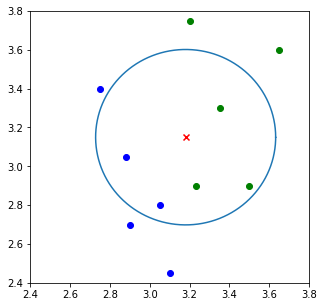

In [64]:
def circle(r, a, b):  # 为了画出圆，这里采用极坐标的方式对圆进行表示 ：x=r*cosθ，y=r*sinθ。
    theta = np.arange(0, 2*np.pi, 0.01)
    x = a+r * np.cos(theta)
    y = b+r * np.sin(theta)
    return x, y


k_circle_x, k_circle_y = circle(r, 3.18, 3.15)

plt.figure(figsize=(5, 5))
plt.xlim((2.4, 3.8))
plt.ylim((2.4, 3.8))
x_feature = list(map(lambda x: x[0], features))  # 返回每个数据的x特征值
y_feature = list(map(lambda y: y[1], features))
plt.scatter(x_feature[:5], y_feature[:5], c="b")  # 在画布上绘画出"A"类标签的数据点
plt.scatter(x_feature[5:], y_feature[5:], c="g")
plt.scatter([3.18], [3.15], c="r", marker="x")  # 待测试点的坐标为 [3.1，3.2]
plt.plot(k_circle_x, k_circle_y)

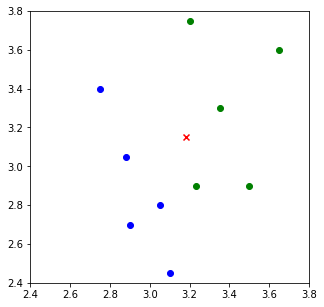

In [54]:
#示例数据绘图
plt.figure(figsize=(5, 5))
plt.xlim((2.4, 3.8))
plt.ylim((2.4, 3.8))
x_feature = list(map(lambda x: x[0], features))  # 返回每个数据的x特征值
y_feature = list(map(lambda y: y[1], features))
plt.scatter(x_feature[:5], y_feature[:5], c="b")  # 在画布上绘画出"A"类标签的数据点
plt.scatter(x_feature[5:], y_feature[5:], c="g")
plt.scatter([3.18], [3.15], c="r", marker="x")